# <div style="color:white;display:fill;border-radius:5px;background-color:#0E2031;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Carregamento dos Dados</p></div> 

In [69]:
# Bibliotecas Basicas
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Carregamento dos dados
ROOT_DIR = 'C:/Users/Alysson/Documents/Projects/exercicio_eda'
data_raw = pd.read_csv(f'{ROOT_DIR}/dataset.csv')

In [82]:
data = data_raw.copy()

In [83]:
# Linnhas, Colunas
data.shape

(2633521, 8)

# <div style="color:white;display:fill;border-radius:5px;background-color:#0E2031;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Tratamento das Variaveis</p></div> 

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Removendo Dados Duplicados</p></div> 

In [84]:
#Verificando order_id duplicado
data.duplicated(subset='order_id').sum()

1198255

In [85]:
#Mantendo apenas o ultimo registro de order_id
data=data.drop_duplicates(subset='order_id', keep='last')

In [86]:
#Verificando qualquer duplicado
data.duplicated().sum()

0

**Analise:** Existiam varias order_id com valores duplicados, todas as linhas que tiveram essa ocorrencia foi mantidas o ultimo valor de registro

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Verificando dados Faltantes</p></div>

In [87]:
# Verificando valores faltantes totais por coluna
data.isna().sum()

event_time             0
order_id               0
product_id             0
category_id       124424
category_code     331575
brand             173562
price             124424
user_id          1043352
dtype: int64

**Analise:** 

Existem valores faltantes em alguns campos, que impactam na nossa analise, no entanto serão mantidos pois ainda é considerado que o pedido de ordem existiu, que é uma das analises mais importantes. 

De qualquer forma os valores faltantes representam um efeito muito negativo na nossa analise, pois prejudicam analises como, de faturamento, clientes unicos totais, marcas totais disponiveis, etc.

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Removendo dados não utilizaveis</p></div> 

In [88]:
#Removendo colunas category_code e category_id
data=data.drop(columns=['category_code','category_id'], axis=1)

**Analise:** Não foi pedido no exercicio nenhuma analise com relação a categoria...

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Ajustando as variaveis temporais</p></div> 

In [89]:
#Converter para um formato mais legivel de data ao inves de texto
data['event_time'] = pd.to_datetime(data['event_time'])

In [91]:
#Extração de informações de hora, minuto, mês, semestre e ano
data['hour'] = data['event_time'].dt.hour
data['minute'] = (data['event_time'].dt.minute // 15) * 15  #agrupado em 0 min, 15min, 30min, 45min
data['month'] = data['event_time'].dt.month
data['quarter'] = data['event_time'].dt.quarter
data['year'] = data['event_time'].dt.year
data['time'] = data.apply(lambda row: f'{row["hour"]:02}:{row["minute"]:02}', axis=1)

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Removendo dados Estranhos</p></div> 

Este dataset possuem registros dos anos de 1970 e 2020. Para um problema de negócio real é um pouco estranho que existam valores com apenas esses dois intervalos, então os registros dos anos de 1970 não será usado.

In [92]:
#Verificando todos os anos disponiveis na base de dados
data['year'].unique()

array([2020, 1970])

In [93]:
#Selecionando apenas o ano de 2020
data=data.loc[data['year']==2020].sort_values(by='event_time')

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Ajustando Tipo de Dados</p></div> 

In [94]:
df = data.copy()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1426253 entries, 65680 to 2633520
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype              
---  ------      --------------    -----              
 0   event_time  1426253 non-null  datetime64[ns, UTC]
 1   order_id    1426253 non-null  int64              
 2   product_id  1426253 non-null  int64              
 3   brand       1254076 non-null  object             
 4   price       1302874 non-null  float64            
 5   user_id     391154 non-null   float64            
 6   hour        1426253 non-null  int32              
 7   minute      1426253 non-null  int32              
 8   month       1426253 non-null  int32              
 9   quarter     1426253 non-null  int32              
 10  year        1426253 non-null  int32              
 11  time        1426253 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), int32(5), int64(2), object(2)
memory usage: 114.3+ MB


In [433]:
#Dataset está com valores separados por "," e "." o que não é indicado. Além disso a separação em casas decimais
#no power BI é por ",". Os todos dados então serão separados por ",".

df['price'] = df['price'].astype(str).str.replace(',', '.')
df['price'] = df['price'].apply(lambda x: '{:.2f}'.format(float(x)))
df['price'] = df['price'].astype(str).str.replace('.', ',')

In [436]:
# preco_sem_nulo = data['price'].dropna()
# formato_correto = preco_sem_nulo.apply(lambda x: bool(re.match(r'^\d+\.\d{2}$', str(x))))
# preco_incorreto = preco_sem_nulo.loc[~formato_correto]
# print(preco_incorreto)

In [96]:
data['user_id'] = data['user_id'].astype(object)

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Salvando Alterações</p></div> 

In [97]:
df.to_csv(f'{ROOT_DIR}/dataset_mod.csv', sep=';', index=False)

# <div style="color:white;display:fill;border-radius:5px;background-color:#0E2031;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Analise Exploratória dos Dados</p></div>

As perguntas propostas inicialmente serão respondidas agora. essas mesmas respostas também poderão ser respondidas no dashboard do BI, disponibilizado na pagina inicial.


### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:100%">Qual horário temos mais vendas?</p></div> 

In [450]:
sales_by_time = data.groupby(['hour', 'minute'])['order_id'].count().reset_index(name='number_of_sales')

In [451]:
sales_by_time['time'] = sales_by_time.apply(lambda row: f'{row["hour"]:02}:{row["minute"]:02}', axis=1)

In [452]:
# Obter o horário com mais vendas
best_time_index = sales_by_time['number_of_sales'].idxmax()
best_time = sales_by_time.loc[best_time_index, 'time']

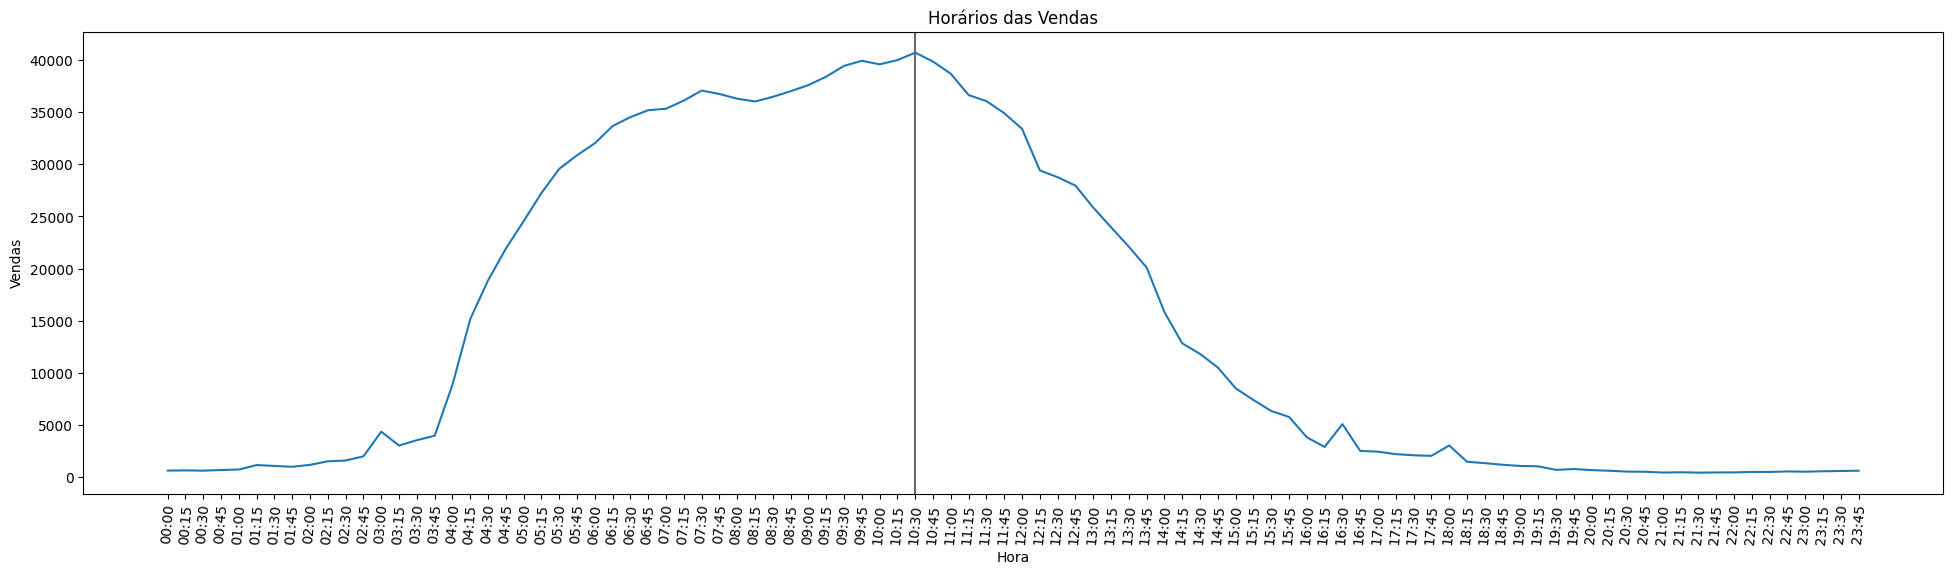

In [458]:
plt.figure(figsize=(24,6))
sns.lineplot(x='time', y='number_of_sales', data=sales_by_time)
#sns.set_style('ggplot')
plt.title('Horários das Vendas')
plt.xlabel('Hora')
plt.ylabel('Vendas')
plt.xticks(rotation=85)
plt.axvline(x=best_time_index, color='dimgray')
plt.show()

In [459]:
sales_by_time[['number_of_sales','time']].sort_values(by='number_of_sales', ascending=False).head()

,number_of_sales,time
42,40691,10:30
41,39978,10:15
39,39910,09:45
43,39835,10:45
40,39572,10:00


### Analise

**R1:** O melhor horario de venda é em torno das 10:30 foram registrados 40691 vendas nesse horário.

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:100%">Qual a marca tem o maior faturamento?</p></div> 

In [463]:
sales_brand = data.groupby(['brand'])['price'].sum().reset_index(name='faturamento').sort_values(by='faturamento', ascending=False)

In [490]:
sales_brand['pct'] = round(sales_brand['faturamento']/sales_brand['faturamento'].sum()*100,2)

In [491]:
sales_brand.head()

,brand,faturamento,pct
11281,samsung,53831519.49,26.07
10641,apple,36571170.17,17.71
11058,lg,14224815.52,6.89
10659,asus,7057891.87,3.42
11055,lenovo,6755294.66,3.27


### Analise

**R2:** A marca que representa o maior faturamento da empresa é a samsung com 27.06% do faturamento totalizando, $53.831.519,66

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:100%">Qual mês temos o maior faturamento?</p></div> 

In [468]:
sales_by_month = data.groupby(['month'])['price'].sum().reset_index(name='sum').sort_values(by='sum', ascending=False)

In [469]:
sales_by_month

,month,sum
7,8,36902067.04
8,9,32161147.40
5,6,25290595.98
6,7,19421933.38
2,3,19356674.27
4,5,18251726.54
1,2,15828610.55
9,10,14582640.50
0,1,13508240.95
10,11,8652731.84


In [471]:
import matplotlib.ticker as mtick

def money_format(x, pos):
    return f'${x/1e6:.0f}M'

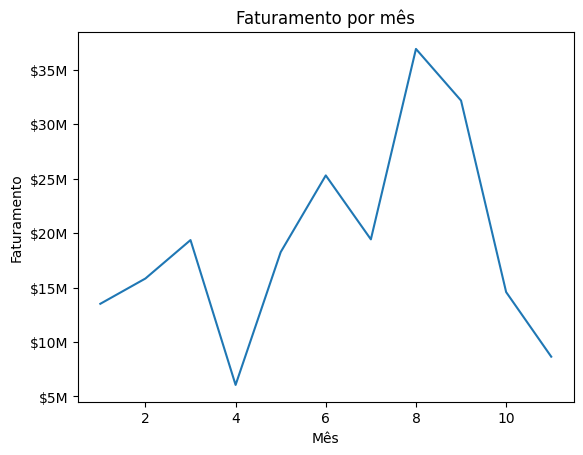

In [472]:
fmt = mtick.FuncFormatter(money_format)

ax = sns.lineplot(x='month', y='sum', data=sales_by_month)
ax.yaxis.set_major_formatter(fmt)

plt.title('Faturamento por mês')
plt.xlabel('Mês')
plt.ylabel('Faturamento');

### Analise

**R3:** O mês de maior faturamento é o mês de agosto totalizando em $36.902.067,04

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:100%">Qual o número de clientes únicos do 3º trimestre de 2020 e qual a variação entre o 1º e 4º trimestre? </p></div> 

In [473]:
nunique_by_quarter = data.groupby(['quarter'])['user_id'].nunique().reset_index(name='nunique_clients').sort_values(by='nunique_clients', ascending=False)
vendas_base = nunique_by_quarter.loc[nunique_by_quarter['quarter'] == 3, 'nunique_clients'].iloc[0]

# Calcula a variação percentual em relação ao primeiro semestre
nunique_by_quarter['variacao_percentual'] = ((nunique_by_quarter['nunique_clients'] - vendas_base) / vendas_base) * 100

In [474]:
nunique_by_quarter

,quarter,nunique_clients,variacao_percentual
2,3,69705,0.000000
1,2,31618,-54.640270
3,4,20668,-70.349329
0,1,4951,-92.897210


### Analise

**R4:** A variação percentual dos clientes do primeiro semestre para o terceiro foi de -92,89% e a variação percentual do terceiro semestre para o quarto foi de -70,34%

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:100%">Qual mês obteve o maior ticket médio e quanto esse resultado é maior que a média total de 2020.</p></div> 

In [475]:
avg_ticket = data.groupby(['month'])['price'].mean().reset_index(name='avg_ticket').sort_values(by='avg_ticket', ascending=False)
avg_ticket

,month,avg_ticket
7,8,217.703604
9,10,214.712671
10,11,201.573215
6,7,190.639131
8,9,171.868022
4,5,157.633276
3,4,148.781337
2,3,139.491477
5,6,136.847950
0,1,118.066645


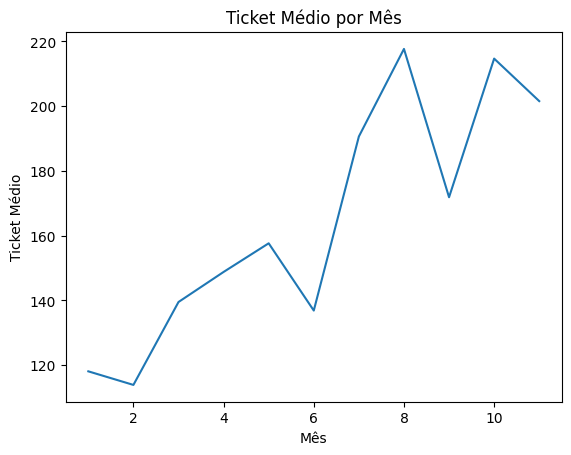

In [476]:
sns.lineplot(x='month', y='avg_ticket', data=avg_ticket)
plt.title('Ticket Médio por Mês')
plt.xlabel('Mês')
plt.ylabel('Ticket Médio');

In [495]:
# Mês com maior ticket médio
max_avg_ticket=round(avg_ticket['avg_ticket'].max(),2)
max_avg_ticket

217.7

In [492]:
# Ticket médio de 2020
avg_ticket_2020=round(data['price'].loc[data['year']==2020].mean(),2)
avg_ticket_2020

161.2

In [496]:
# Razão
max_avg_ticket/avg_ticket_2020

1.3504962779156329

### Analise

**R5:** O mês com maior ticket médio foi o mês de agosto com $217.70, e o ticket médio de 2020 foi de 161,20... O ticket médio do melhor mês é 35,05% maior que a média anual.

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:100%">Qual produto obteve maior participação de vendas no 2º semestre de 2020?</p></div> 

In [484]:
prod_on_2semester = data.loc[(data['quarter']==2)&(data['year']==2020)].groupby(['product_id'])['product_id'].count().reset_index(name='number_of_products').sort_values(by='number_of_products', ascending=False).head()

In [486]:
prod_on_2semester

,product_id,number_of_products
9156,1515966223523303310,8277
9150,1515966223523303302,7723
9149,1515966223523303301,4838
9154,1515966223523303308,3480
282,1515966223509089486,2960


### Analise

**R6:** O produto com mais participações em vendas no segundo semestre de 2020 foi o produto "1515966223523303301" com 13582 registros de venda

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Quais são os top 5 produtos de maior venda 2020?</p></div> 

In [487]:
best5_products = data.loc[data['year']==2020].groupby(['product_id'])['product_id'].count().reset_index(name='number_of_products').sort_values(by='number_of_products', ascending=False).head()

In [488]:
best5_products

,product_id,number_of_products
13108,1515966223523303302,19321
13116,1515966223523303310,13841
13107,1515966223523303301,13484
13114,1515966223523303308,9349
13120,1515966223523303314,6928


In [489]:
data.product_id.nunique()

21932

### Analise

**R7:** Os cinco produtos com mais registro de vendas são "1515966223523303302", "1515966223523303301", "1515966223523303308", "1515966223523303310", "1515966223523303314"

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:100%">Qual tipo de informação você considera importante para compor uma análise de cliente?</p></div> 

**R9**

- Ticket Médio do cliente
- Frequencia com que o cliente realiza as compras
- Recencia entre as compras (principalmente a ultima) realizadas pelo cliente
- Quantidade de produtos unicos que o cliente compra
- Quantidade total de produtos que o cliente compra
- Produto(s) mais caro(s) adquirido pelo cliente
- Avaliações dos clientes sobre os produtos, experiencia de compra, etc
- Preferencia de forma de pagamento
- Participações em programas de fidelidade

### <div style="color:white;display:fill;border-radius:5px;background-color:#2E6B8E;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:100%">Com base nesse dataset, qual sugestão de análise ou visualização adicional você recomendaria?</p></div> 

**R10**

- Quais categorias mais vendidas e quantas categorias unicas possui o dataset?
- Quantos produtos unicos possuem cada uma das categorias?
- Qual a porcentagem do faturamento representa cada categoria
- Qual o valor maximo de uma unica em 2020? E em cada mês?
- Cohort
